# Loan status prediction

Problem Statement:- Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form.To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Importing Dataset

In [2]:
df=pd.read_csv('Loan Dataset.csv')
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

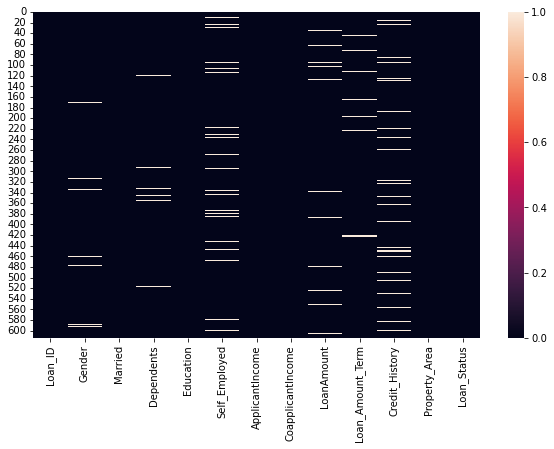

In [6]:
plt.figure(figsize=(10,6))   #white lines indicates NaN value
sns.heatmap(df.isnull())

## Data Visulaization

### Gender

In [7]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

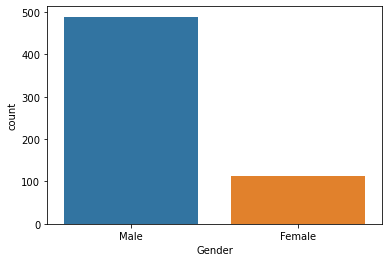

In [8]:
sns.countplot(x="Gender",data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

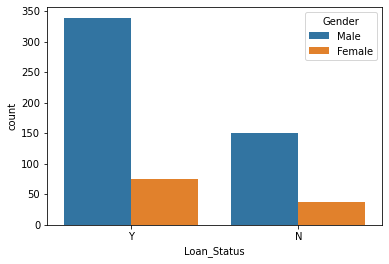

In [9]:
sns.countplot(x="Loan_Status",data=df,hue="Gender")

### Married

In [10]:
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

<AxesSubplot:xlabel='Married', ylabel='count'>

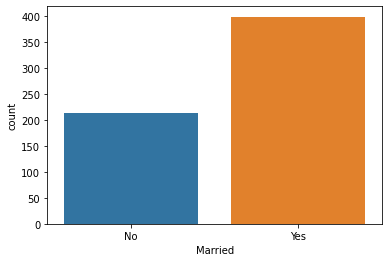

In [11]:
sns.countplot(x='Married',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

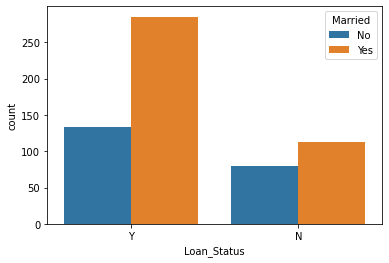

In [12]:
sns.countplot(x='Loan_Status',data=df,hue="Married")

### Dependents

In [13]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

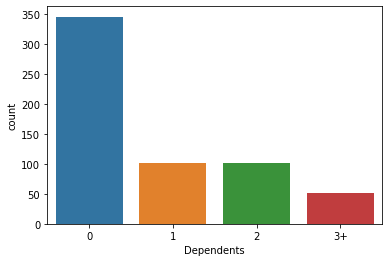

In [14]:
sns.countplot(x='Dependents',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

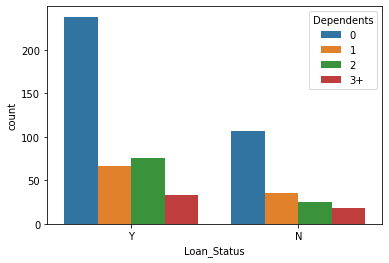

In [15]:
sns.countplot(x="Loan_Status",data=df,hue="Dependents")

### Education

In [16]:
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

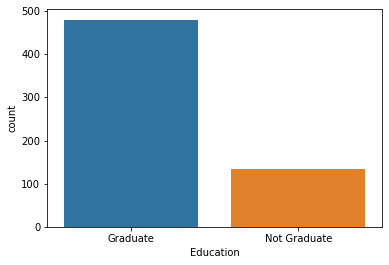

In [17]:
sns.countplot(x='Education',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

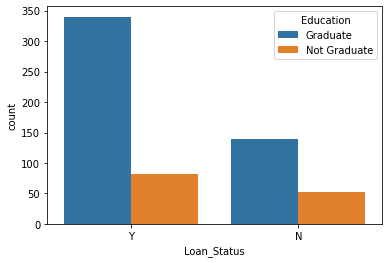

In [18]:
sns.countplot(x='Loan_Status',data=df,hue="Education")

### Self Employed

In [19]:
df.Self_Employed.value_counts(dropna=False)  #dropna include NaN values

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

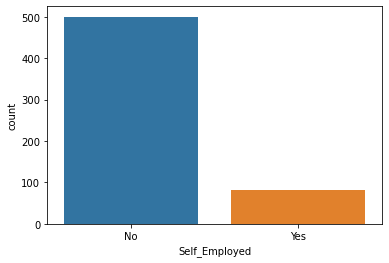

In [20]:
sns.countplot(x="Self_Employed",data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

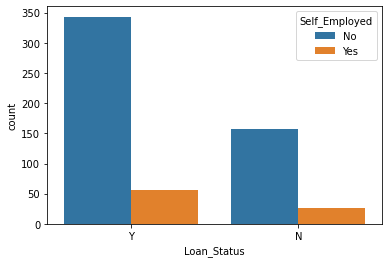

In [21]:
sns.countplot(x='Loan_Status',data=df,hue='Self_Employed')

### Loan Tenure in days

In [22]:
df.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

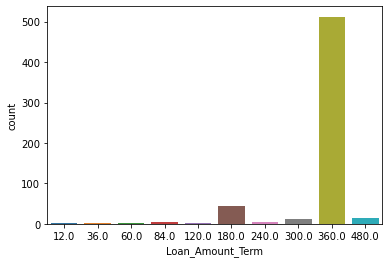

In [23]:
sns.countplot(x='Loan_Amount_Term',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

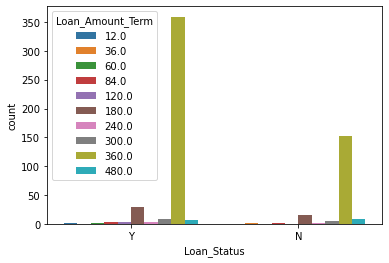

In [24]:
sns.countplot(x='Loan_Status',data=df,hue='Loan_Amount_Term')

### Credit History

In [25]:
df.Credit_History.value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

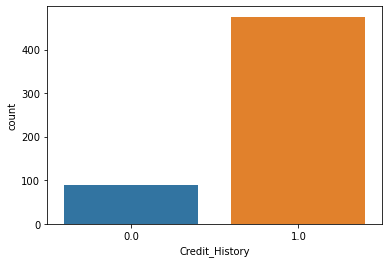

In [26]:
sns.countplot(x="Credit_History",data=df)  # 0:bad , 1:good

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

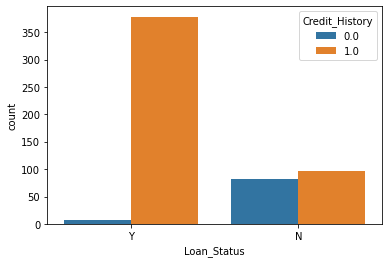

In [27]:
sns.countplot(x="Loan_Status",data=df,hue="Credit_History")

### Property Area

In [28]:
df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

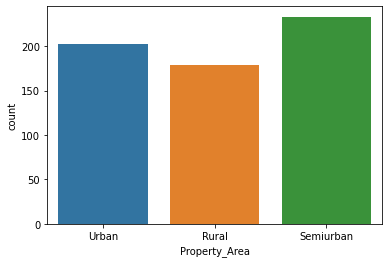

In [29]:
sns.countplot(x='Property_Area',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

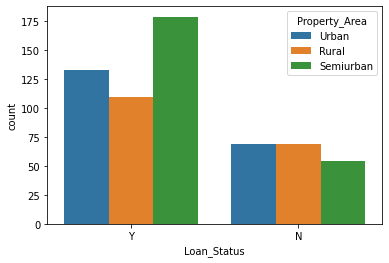

In [30]:
sns.countplot(x='Loan_Status',data=df,hue='Property_Area')

In [31]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<AxesSubplot:>

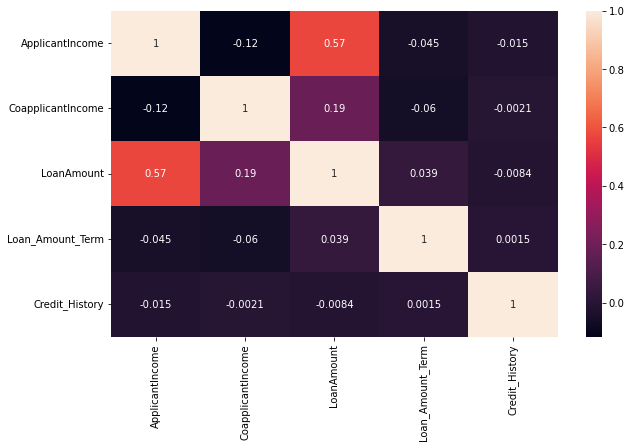

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

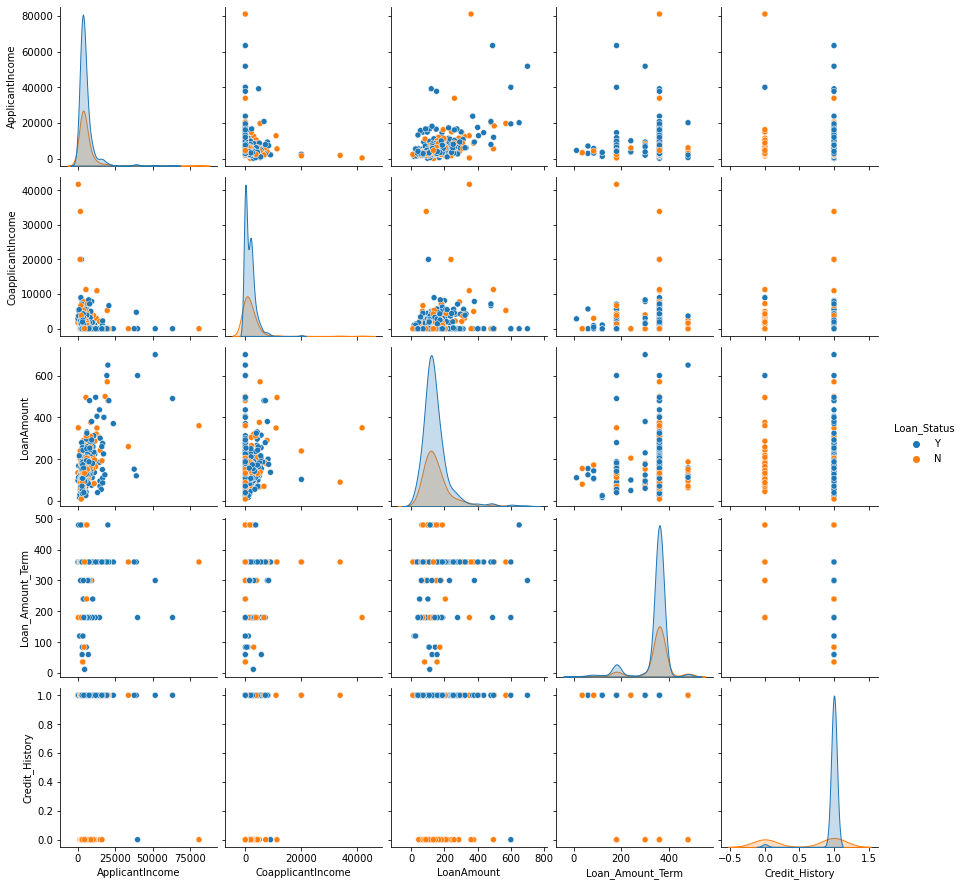

In [33]:
sns.pairplot(df,hue="Loan_Status")

### Numerical Data

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

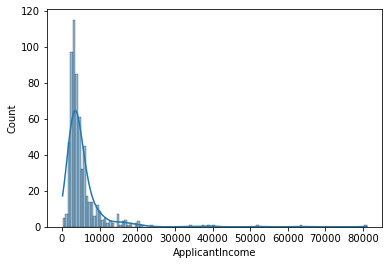

In [34]:
sns.histplot(data=df,x="ApplicantIncome",kde=True)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

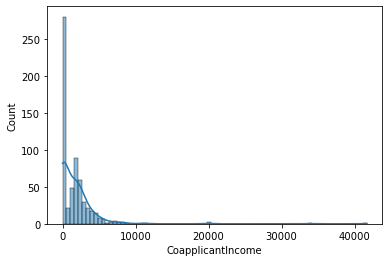

In [35]:
sns.histplot(data=df,x="CoapplicantIncome",kde=True)

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

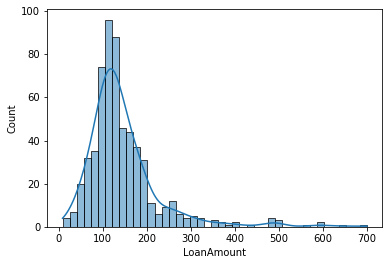

In [36]:
sns.histplot(data=df,x="LoanAmount",kde=True)

## Skewed data Treatment

In [37]:
df.ApplicantIncome=np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome=np.sqrt(df.CoapplicantIncome)
df.LoanAmount=np.sqrt(df.LoanAmount)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

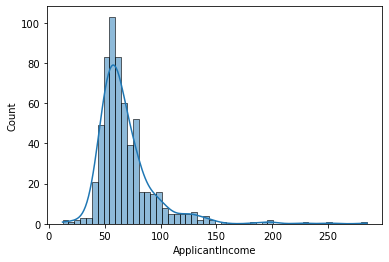

In [38]:
sns.histplot(data=df,x="ApplicantIncome",kde=True)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

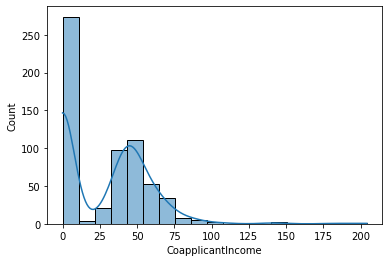

In [39]:
sns.histplot(data=df,x="CoapplicantIncome",kde=True)


<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

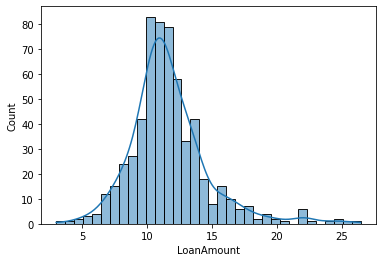

In [40]:
sns.histplot(data=df,x="LoanAmount",kde=True)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

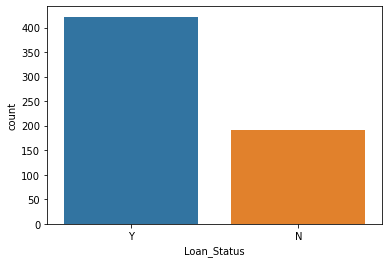

In [41]:
sns.countplot(x="Loan_Status",data=df)   #to check imbalanced data

## Handling missing values

In [42]:
df=df.drop(columns=["Loan_ID"],axis=1)




In [43]:
#For Categorical Data
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)



In [44]:
#For Numerical Data
df["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean(),inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mean(),inplace=True)

In [45]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Encoding Categorical Data


In [46]:
df=pd.get_dummies(df)  
df=df.drop(columns=["Gender_Female","Married_No","Dependents_3+","Education_Not Graduate","Self_Employed_No","Property_Area_Rural","Loan_Status_N"],axis=1)
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,76.478755,0.000000,11.709994,360.0,1.0,1,0,1,0,0,1,0,0,1,1
1,67.697858,38.832976,11.313708,360.0,1.0,1,1,0,1,0,1,0,0,0,0
2,54.772256,0.000000,8.124038,360.0,1.0,1,1,1,0,0,1,1,0,1,1
3,50.823223,48.559242,10.954451,360.0,1.0,1,1,1,0,0,0,0,0,1,1
4,77.459667,0.000000,11.874342,360.0,1.0,1,0,1,0,0,1,0,0,1,1


### Seperating Variable

In [47]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values


### Splitting dataset


In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40)

## Modeling Phase

In [49]:
def models(x_train,y_train):
    #Logistics Regression
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(max_iter=1000)
    log.fit(x_train,y_train)
    
    #K Nearest Neighbor 
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    
    #Support Vector Machine
    from sklearn.svm import SVC
    svc_lin=SVC(kernel="linear",random_state=0)
    svc_lin.fit(x_train,y_train)
     
    #SVM rbf
    from sklearn.svm import SVC
    svc_rbf=SVC(kernel="rbf",random_state=0)
    svc_rbf.fit(x_train,y_train)
    
    #Naive Bayes Classifier
    from sklearn.naive_bayes import GaussianNB
    nb=GaussianNB()
    nb.fit(x_train,y_train)
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion="entropy",random_state=0)
    tree.fit(x_train,y_train)
    
    #Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=0)
    forest.fit(x_train,y_train)
    
    #printing model accuracy on training data
    
    print("1.Logistic Regression Training Accuracy:",log.score(x_train,y_train))
    print("2.K Neighbors Classifier Training Accuracy:",knn.score(x_train,y_train))
    print("3.SVM Training Accuracy:",svc_lin.score(x_train,y_train))
    print("4.SVM rbf Training Accuracy:",svc_rbf.score(x_train,y_train))
    print("5.Decision Tree Classifier Training Accuracy:",tree.score(x_train,y_train))
    print("6.Random Forest Classifier Training Accuracy",forest.score(x_train,y_train))
    
    return log,knn,svc_lin,svc_rbf,tree,forest

In [50]:
model=models(x_train,y_train)

1.Logistic Regression Training Accuracy: 0.8024439918533605
2.K Neighbors Classifier Training Accuracy: 0.7352342158859471
3.SVM Training Accuracy: 0.8024439918533605
4.SVM rbf Training Accuracy: 0.6720977596741344
5.Decision Tree Classifier Training Accuracy: 1.0
6.Random Forest Classifier Training Accuracy 0.9796334012219959


## Confusion Matrix

Confusion Matrix:


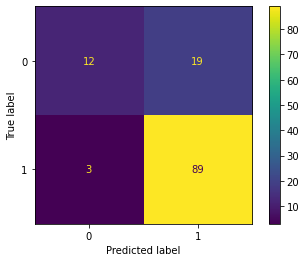

model 1 Testing Accuracy: 0.8211382113821138

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.39      0.52        31
           1       0.82      0.97      0.89        92

    accuracy                           0.82       123
   macro avg       0.81      0.68      0.71       123
weighted avg       0.82      0.82      0.80       123



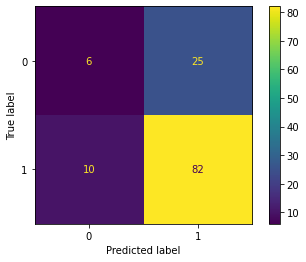

model 2 Testing Accuracy: 0.7154471544715447

Classification Report:

              precision    recall  f1-score   support

           0       0.38      0.19      0.26        31
           1       0.77      0.89      0.82        92

    accuracy                           0.72       123
   macro avg       0.57      0.54      0.54       123
weighted avg       0.67      0.72      0.68       123



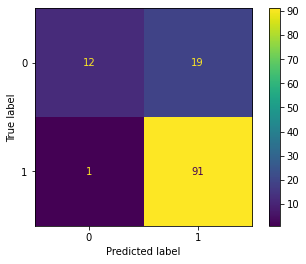

model 3 Testing Accuracy: 0.8373983739837398

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.39      0.55        31
           1       0.83      0.99      0.90        92

    accuracy                           0.84       123
   macro avg       0.88      0.69      0.72       123
weighted avg       0.85      0.84      0.81       123



C:\Users\Vivek Kumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vivek Kumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vivek Kumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


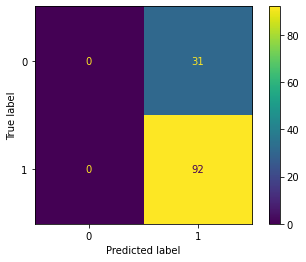

model 4 Testing Accuracy: 0.7479674796747967

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.75      1.00      0.86        92

    accuracy                           0.75       123
   macro avg       0.37      0.50      0.43       123
weighted avg       0.56      0.75      0.64       123



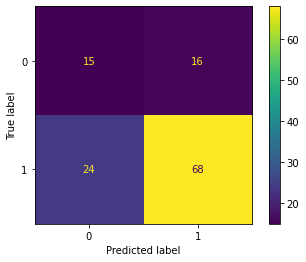

model 5 Testing Accuracy: 0.6747967479674797

Classification Report:

              precision    recall  f1-score   support

           0       0.38      0.48      0.43        31
           1       0.81      0.74      0.77        92

    accuracy                           0.67       123
   macro avg       0.60      0.61      0.60       123
weighted avg       0.70      0.67      0.69       123



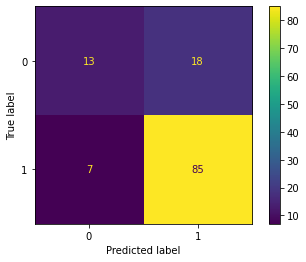

model 6 Testing Accuracy: 0.7967479674796748

Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.42      0.51        31
           1       0.83      0.92      0.87        92

    accuracy                           0.80       123
   macro avg       0.74      0.67      0.69       123
weighted avg       0.78      0.80      0.78       123



In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,classification_report
li=[]
print("Confusion Matrix:")
for i in range(0,len(model)):
    cm=confusion_matrix(y_test,model[i].predict(x_test))
    cd=ConfusionMatrixDisplay(cm).plot()
    cr=classification_report(y_test,model[i].predict(x_test))
    plt.show()
    ac=accuracy_score(y_test,model[i].predict(x_test))
    print("model",i+1,"Testing Accuracy:",ac)
    print("")
    print("Classification Report:")
    print("")
    print(cr)
    
    